In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

%matplotlib notebook

In [2]:
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


## Neural Networks

<IPython.core.display.Javascript object>


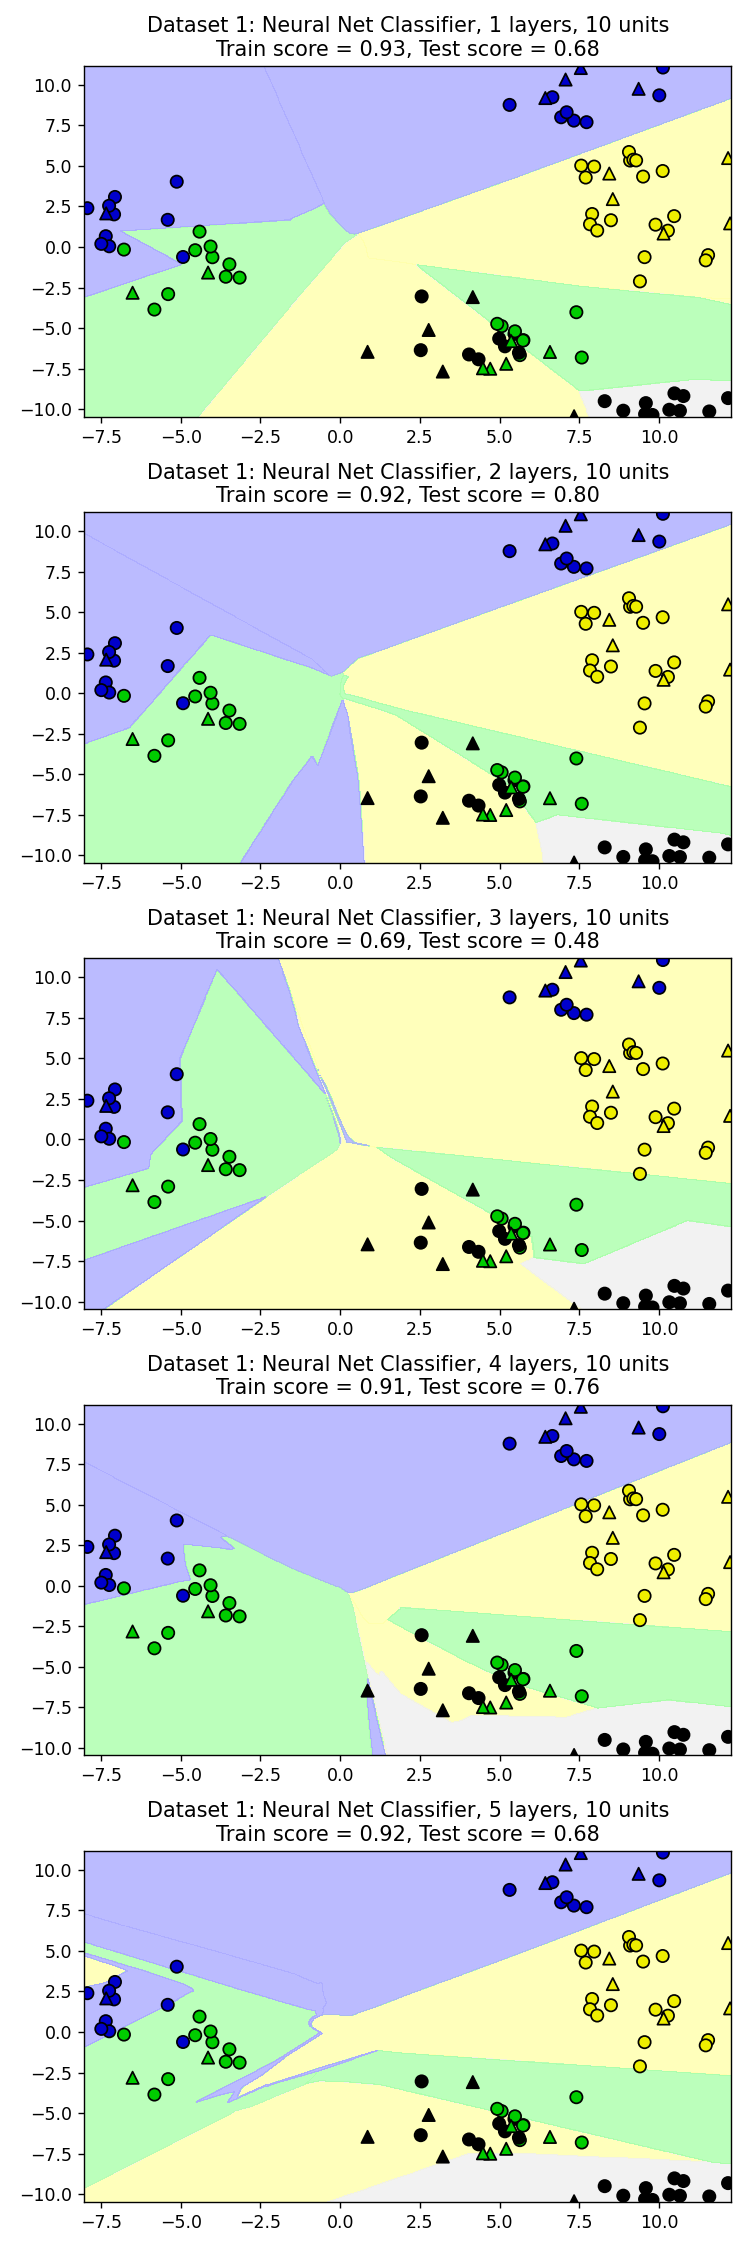

F:\Program Files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layer unit in each layer is:
[10]
layer unit in each layer is:
[10, 10]
layer unit in each layer is:
[10, 10, 10]


F:\Program Files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layer unit in each layer is:
[10, 10, 10, 10]


F:\Program Files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layer unit in each layer is:
[10, 10, 10, 10, 10]


In [14]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

fig, subaxes = plt.subplots(5,1,figsize=(6,18))

for layers, axis in zip([1,2,3,4,5],subaxes):
    layer_unit = []
    i = 0
    while i < layers:
        layer_unit.append(10)
        i += 1
    nnclf = MLPClassifier(hidden_layer_sizes = layer_unit, solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
    print('layer unit in each layer is:')
    print(layer_unit)
    title = 'Dataset 1: Neural Net Classifier, {} layers, 10 units'.format(layers)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()

<IPython.core.display.Javascript object>


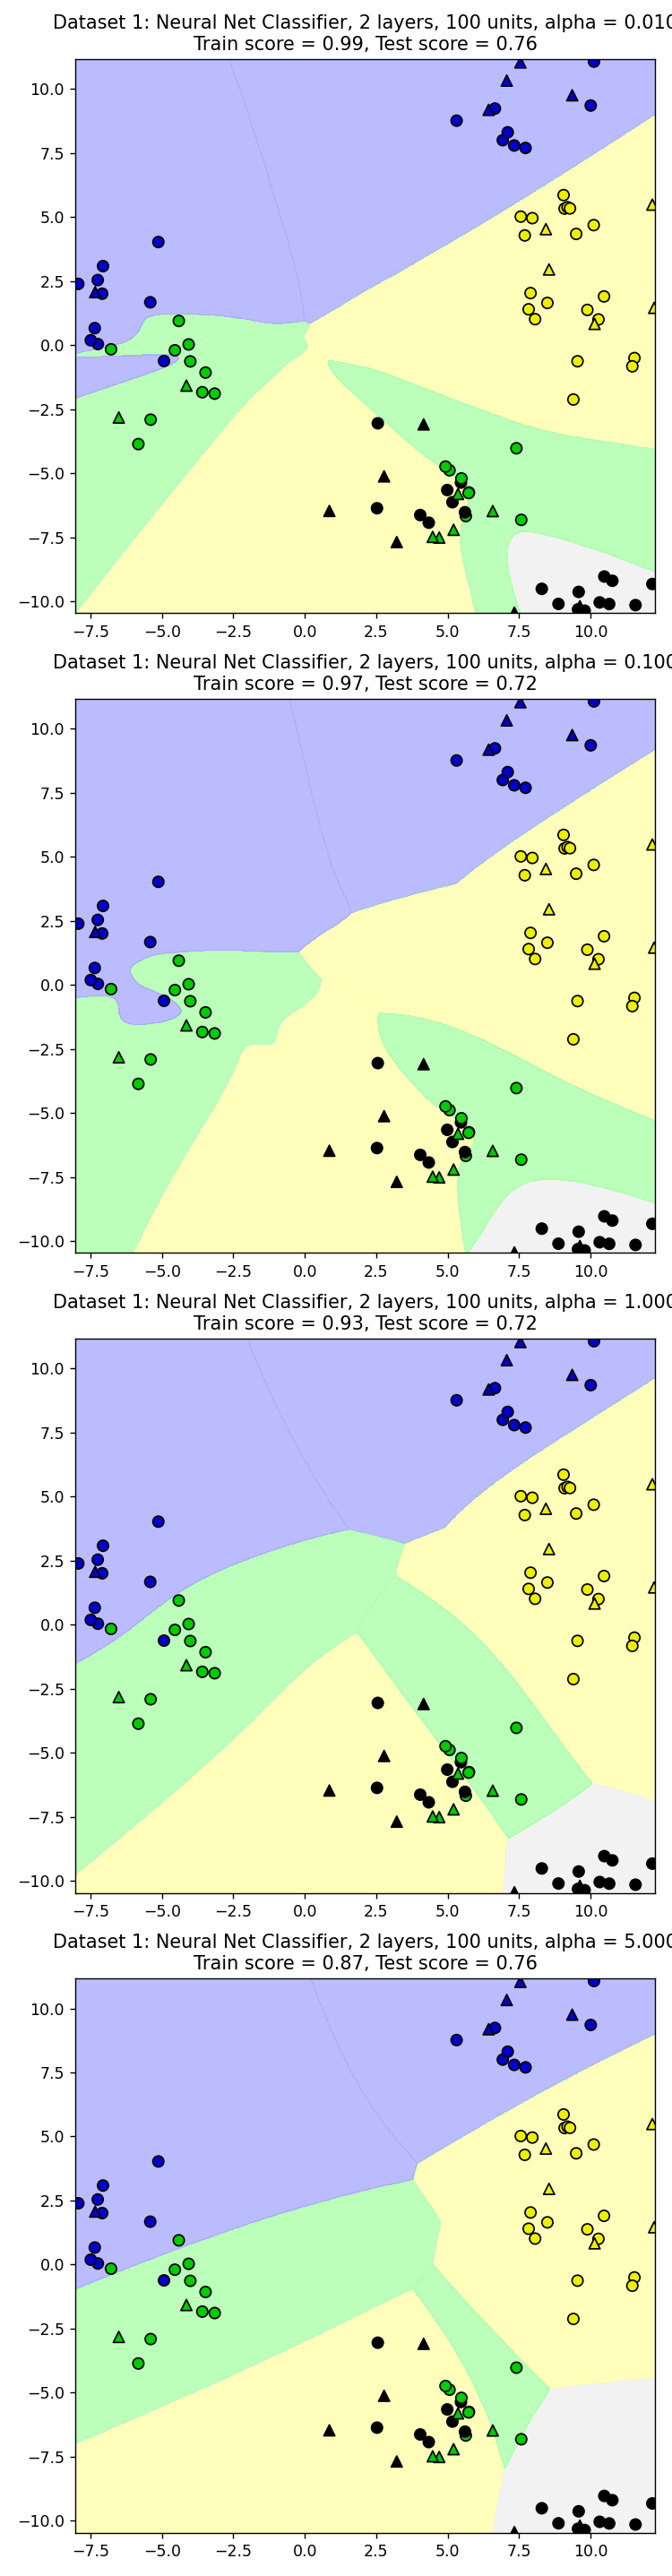

F:\Program Files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
F:\Program Files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
F:\Program Files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



In [15]:
fig, subaxes = plt.subplots(4,1,figsize=(6,23))

for this_alpha, axis in zip([0.01,0.1,1.0,5.0],subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [100,100], solver = 'lbfgs', activation = 'tanh',
                          alpha = this_alpha, random_state = 0).fit(X_train, y_train)
    title = 'Dataset 1: Neural Net Classifier, 2 layers, 100 units, alpha = {:.3f}'.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100,100], solver = 'lbfgs',
                          alpha = 5.0, random_state = 0).fit(X_train_scaled, y_train)

print('Accuracy for training: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy for test: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

Accuracy for training: 0.98
Accuracy for test: 0.97
